In [53]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# from features import common
from IPython.display import Image, HTML

In [125]:
scores_source = pd.read_csv("../data/500sample.csv")
scores_kyle = pd.read_csv("../data/500sample-kyle.csv")
scores_cory = pd.read_csv("../data/500sample-answers_CK.csv")
scores_tom = pd.read_csv("../data/500sample-answers-TY.csv")

In [126]:
merged = pd.merge(scores_kyle, scores_cory, how='inner', left_on='id', right_on='id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_k', '_c'), copy=True, indicator=False)

merged = pd.merge(merged, scores_tom, how='inner', left_on='id', right_on='id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_t'), copy=True, indicator=False)

In [127]:
merged = pd.merge(merged, scores_source, how='inner', left_on='id', right_on='id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_t', '_s'), copy=True, indicator=False)

In [128]:
merged = merged[['id','content_q_k','content_r_k','hasVotes_s','hasVotes_t','hasVotes_c','hasVotes_k']]
merged = merged[merged['hasVotes_k'].notnull()]
merged = merged[merged['hasVotes_t'].notnull()]
merged.head()
print len(merged)

100


In [129]:
scores_cory.keys()

Index([u'id', u'video_r', u'content_q', u'content_r', u'hasVotes'], dtype='object')

In [130]:

def transform(df,col):
  
  def label (row):
    if row[col] == 1 or row[col] == 2:
      return True
    else:
      return False
    
  df[col] = df.apply(label, axis=1)  
  return df[col]
  
# merged['hasVotes_c'] = merged.apply(label('hasVotes_c'), axis=1)  
# merged['hasVotes_t'] = merged.apply(label, axis=1)  

merged['hasVotes_c'] = transform(merged,'hasVotes_c')
merged['hasVotes_t'] = transform(merged,'hasVotes_t')

In [131]:
merged

,id,content_q_k,content_r_k,hasVotes_s,hasVotes_t,hasVotes_c,hasVotes_k
0,147,Is solid state pure HCl acidic in nature?,"Good question, the answer is no: like NaCl, HC...",True,True,True,False
9,2909,Ms. Kelsey has a book that is 2/3 of the way r...,fu ck your dam as s bit ch nobody cares about ...,False,False,False,False
17,6491,why does this seem like it is a kindergarden v...,Because this video is intro to equivalent frac...,True,False,False,True
23,8733,If you have a remainder in a problem like this...,There are three ways to interpret a division p...,True,True,True,True
32,11572,What is the different between Work and Potenti...,Work represents a transfer of energy.\rPotenti...,True,True,True,True
34,11938,Is it possible for a hotspot to somehow be pre...,There are artificial ways and natural ways to ...,True,True,True,False
39,13579,I have a problem with typing angles on the exe...,If you attempt to use square brackets rather t...,True,True,True,True
41,14089,How many conditions are there to speed up a re...,There are a few ways to speed up reactions.\r\...,False,True,True,True
43,14847,Why do they call gold au?,from Latin: aurum,False,True,True,True
46,16231,So with out cheap coal the revolution in Brita...,"I like to speculate about alternate history, j...",False,True,True,True


In [149]:
print "source and tom: ",sum(merged['hasVotes_s'] == merged['hasVotes_t'])/len(merged)
print "source and cory: ",sum(merged['hasVotes_s'] == merged['hasVotes_c'])/len(merged)
print "source and kyle: ",sum(merged['hasVotes_s'] == merged['hasVotes_k'])/len(merged)

source and tom:  0.61
source and cory:  0.56
source and kyle:  0.54


In [151]:
print "tom and kyle: ",sum(merged['hasVotes_k'] == merged['hasVotes_t'])/len(merged)

tom and kyle:  0.63


In [152]:
print "tom and cory: ",sum(merged['hasVotes_c'] == merged['hasVotes_t'])/len(merged)

tom and cory:  0.79


In [153]:
print "cory and kyle: ",sum(merged['hasVotes_c'] == merged['hasVotes_k'])/len(merged)

cory and kyle:  0.7


In [154]:
print "all humans: ",len(merged[(merged['hasVotes_k'] == merged['hasVotes_t']) 
                              & (merged['hasVotes_c'] == merged['hasVotes_t'])])/len(merged)

all humans:  0.56


In [155]:
# all humans in agreement with source
print "all humans and source: ",len(merged[(merged['hasVotes_s'] == merged['hasVotes_k']) 
         & (merged['hasVotes_s'] == merged['hasVotes_c']) 
         & (merged['hasVotes_s'] == merged['hasVotes_t'])])/len(merged)

all humans and source:  0.34


In [156]:
def score(df,source,scorer):
  true_positives = float(np.sum((df[source] == True) & (df[scorer] == True)))
  true_negatives = float(np.sum((df[source] == False) & (df[scorer] == False)))
  false_positives = float(np.sum((df[source] == False) & (df[scorer] == True)))
  false_negatives = float(np.sum((df[source] == True) & (df[scorer] == False)))

  precision = true_positives / max(1, true_positives + false_positives)
  recall = true_positives / max(1, true_positives + false_negatives)
  f1 = (2*precision*recall)/(precision + recall)
  
  return (scorer, precision, recall, f1)

In [157]:
print score(merged,'hasVotes_s','hasVotes_c')

('hasVotes_c', 0.5714285714285714, 0.6792452830188679, 0.6206896551724137)


In [158]:
print score(merged,'hasVotes_s','hasVotes_k')

('hasVotes_k', 0.5686274509803921, 0.5471698113207547, 0.5576923076923078)


In [159]:
print score(merged,'hasVotes_s','hasVotes_t')

('hasVotes_t', 0.625, 0.660377358490566, 0.6422018348623852)


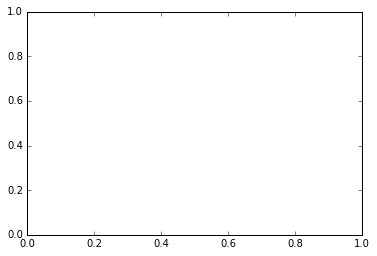

In [83]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [84]:
a, b = 2.30984964515, 0.62687954301
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

In [85]:
x = np.linspace(beta.ppf(0.01, a, b),
              beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
         'r-', lw=5, alpha=0.6, label='beta pdf')